## Introduction et importation des bibliothèques

In [1]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données

In [2]:
# Charger les données
data = pd.read_csv("assets/gene-expression.tsv", sep='\t')

# Check si il y des data
if data.empty:
    raise ValueError("No data found")


## Configuration des paramètres d'affichage

In [3]:
# Convfigurer Pandas pour afficher que 2 decimales
pd.options.display.float_format = '{:.2f}'.format

# Configuration de Matplotlib pour avoir des graphiques plus grands
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['figure.dpi'] = 100

## Exploration initiale des données

Check les  5 premieres data

In [4]:
data.head()

,ensembl,entrez,symbol,genename,E3KO_1,E3KO_2,E3KO_3,E3WT_1,E3WT_2,E3WT_3
0,ENSMUSG00000000544,59290,Gpa33,glycoprotein A33 (transmembrane),502.44,473.95,467.34,3696.80,3664.49,3908.38
1,ENSMUSG00000000731,11634,Aire,autoimmune regulator (autoimmune polyendocrino...,586.00,518.87,547.02,3607.41,3834.54,3653.05
2,ENSMUSG00000005566,21849,Trim28,tripartite motif-containing 28,1296.84,1117.50,1181.78,102635.25,100109.81,104463.89
3,ENSMUSG00000017707,26943,Serinc3,serine incorporator 3,10030.14,10696.46,10144.50,2429.44,2478.13,2519.30
4,ENSMUSG00000018924,11687,Alox15,arachidonate 15-lipoxygenase,2016.96,2115.82,2132.58,78.47,86.52,63.25


## Affichage des dernières lignes
Check les 5 dernieres

In [5]:
data.tail()

,ensembl,entrez,symbol,genename,E3KO_1,E3KO_2,E3KO_3,E3WT_1,E3WT_2,E3WT_3
20880,ENSMUSG00000074565,---,---,---,1.03,48.59,2.69,0.99,94.47,2.34
20881,ENSMUSG00000075014,---,---,---,12.38,684.80,14.32,10.93,1351.44,9.37
20882,ENSMUSG00000075015,---,---,---,3.10,50.42,3.58,2.98,106.40,2.34
20883,ENSMUSG00000087580,---,---,---,53.65,926.82,50.14,5.96,2063.45,2.34
20884,ENSMUSG00000090650,---,---,---,3.10,154.01,3.58,5.96,357.00,10.54


## Statistiques descriptives
Affiche la moyenne. ecart-type, etc, ...

In [6]:
data.describe()

,E3KO_1,E3KO_2,E3KO_3,E3WT_1,E3WT_2,E3WT_3
count,20885.00,20885.00,20885.00,20885.00,20885.00,20885.00
mean,1876.76,1901.18,1884.71,2033.84,2025.03,2023.20
std,7158.75,7293.17,7256.91,8060.95,7967.11,7873.37
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,15.48,14.67,15.22,9.93,10.94,10.54
50%,258.96,256.69,257.84,222.48,218.78,222.53
75%,1605.32,1615.29,1600.77,1574.27,1559.27,1576.47
max,347942.32,344706.98,343718.84,417131.08,414946.05,404390.00


## Informations sur les données

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20885 entries, 0 to 20884
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ensembl   20885 non-null  object 
 1   entrez    20885 non-null  object 
 2   symbol    20885 non-null  object 
 3   genename  20885 non-null  object 
 4   E3KO_1    20885 non-null  float64
 5   E3KO_2    20885 non-null  float64
 6   E3KO_3    20885 non-null  float64
 7   E3WT_1    20885 non-null  float64
 8   E3WT_2    20885 non-null  float64
 9   E3WT_3    20885 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.6+ MB


## Colonnes des données

Affiche les colonnes des datas

In [8]:
data.columns

Index(['ensembl', 'entrez', 'symbol', 'genename', 'E3KO_1', 'E3KO_2', 'E3KO_3',
       'E3WT_1', 'E3WT_2', 'E3WT_3'],
      dtype='object')

## Analyse des colonnes et filtrage

Nous voulons analyse des valeur float, car le reste est des objects

## Filtrage

Filtrer les gènes qui on plus de 13 caractères

In [9]:
# Filtrer les donnees pour que les genes aient une longueur de plus de 13 caracteres
data.loc[data['genename'].str.len() > 13, ['symbol', 'genename']]

,symbol,genename
0,Gpa33,glycoprotein A33 (transmembrane)
1,Aire,autoimmune regulator (autoimmune polyendocrino...
2,Trim28,tripartite motif-containing 28
3,Serinc3,serine incorporator 3
4,Alox15,arachidonate 15-lipoxygenase
...,...,...
20871,Gm5531,predicted gene 5531
20873,Mon1a,MON1 homolog A (yeast)
20874,Gm5415,predicted gene 5415
20875,Ptgds,prostaglandin D2 synthase (brain)


Genes contenant le mot glutamyl

In [10]:
# Filtrer les donnees pour que les genes contiennent 'glutamyl'
data.loc[data['symbol'].str.contains('glutamyl', case=False) | data['genename'].str.contains('glutamyl', case=False), ['symbol', 'genename']]

,symbol,genename
1252,Ggact,gamma-glutamylamine cyclotransferase
1889,Ggt1,gamma-glutamyltransferase 1
1931,Fpgs,folylpolyglutamyl synthetase
3093,Eprs,glutamyl-prolyl-tRNA synthetase
4579,Pgpep1l,pyroglutamyl-peptidase I-like
5316,Ears2,glutamyl-tRNA synthetase 2 (mitochondrial)(put...
5830,Tpgs2,tubulin polyglutamylase complex subunit 2
7145,Pgpep1,pyroglutamyl-peptidase I
8272,Ggh,gamma-glutamyl hydrolase
10739,Ggct,gamma-glutamyl cyclotransferase


Nettoyer les données

In [11]:
# delete columns 'ensembl', 'entrez', 'genename'
data = data.drop(columns=['ensembl', 'entrez', 'genename'])

# rename column 'symbol' to 'gene'
data = data.rename(columns={'symbol': 'gene'})
data


,gene,E3KO_1,E3KO_2,E3KO_3,E3WT_1,E3WT_2,E3WT_3
0,Gpa33,502.44,473.95,467.34,3696.80,3664.49,3908.38
1,Aire,586.00,518.87,547.02,3607.41,3834.54,3653.05
2,Trim28,1296.84,1117.50,1181.78,102635.25,100109.81,104463.89
3,Serinc3,10030.14,10696.46,10144.50,2429.44,2478.13,2519.30
4,Alox15,2016.96,2115.82,2132.58,78.47,86.52,63.25
...,...,...,...,...,...,...,...
20880,---,1.03,48.59,2.69,0.99,94.47,2.34
20881,---,12.38,684.80,14.32,10.93,1351.44,9.37
20882,---,3.10,50.42,3.58,2.98,106.40,2.34
20883,---,53.65,926.82,50.14,5.96,2063.45,2.34


## Comptage de genes differents

In [12]:
# Afficher les valeurs dans la colonne 'gene'
data["gene"].value_counts()

gene
---              4269
Hist1h4m            9
0610010B08Rik       5
Hist2h3c1           4
Hist1h2ac           3
                 ... 
Pspc1               1
Glt8d1              1
Mrpl33              1
Foxr2               1
Rnf183              1
Name: count, Length: 16542, dtype: int64

il y A 16542 genes dans ces datas

## Creation d'un index

In [13]:
# Efface les genes contenant "---"
data2 = data[~data.gene.str.contains("---")]

# Check si il y des data doublons
assert all(data.index.duplicated() == False)

# Pivoter les donnees pour avoir les genes en lignes
data2 = data2.pivot_table(index="gene", aggfunc="mean")
data2

,E3KO_1,E3KO_2,E3KO_3,E3WT_1,E3WT_2,E3WT_3
gene,,,,,,
0610005C13Rik,207.37,199.85,230.09,93.36,89.50,100.73
0610007P14Rik,1285.49,1348.52,1268.62,1642.80,1619.94,1513.22
0610009B22Rik,570.53,598.63,512.10,899.86,769.69,791.75
0610009D07Rik,1984.98,2204.75,2018.87,2443.34,2411.51,2472.46
0610009L18Rik,4.13,8.25,5.37,3.97,3.98,2.34
...,...,...,...,...,...,...
Zyg11b,3119.85,3245.24,3140.67,1974.54,2080.36,2005.14
Zyx,3188.97,3141.65,3283.92,1318.01,1286.80,1352.76
Zzef1,2131.48,2164.41,2133.47,1624.92,1737.28,1787.29


## Hierachise les datas

In [14]:
# Reorganisation des colonnes en multi-index
data2.columns = data2.columns.str.split(r"_(\d)", expand=True).droplevel(-1)
data2.head()

E3KO                    E3WT                
                    1       2       3       1       2       3
gene                                                         
0610005C13Rik  207.37  199.85  230.09   93.36   89.50  100.73
0610007P14Rik 1285.49 1348.52 1268.62 1642.80 1619.94 1513.22
0610009B22Rik  570.53  598.63  512.10  899.86  769.69  791.75
0610009D07Rik 1984.98 2204.75 2018.87 2443.34 2411.51 2472.46
0610009L18Rik    4.13    8.25    5.37    3.97    3.98    2.34

Analyse des datas avec un historigramme

<Axes: >

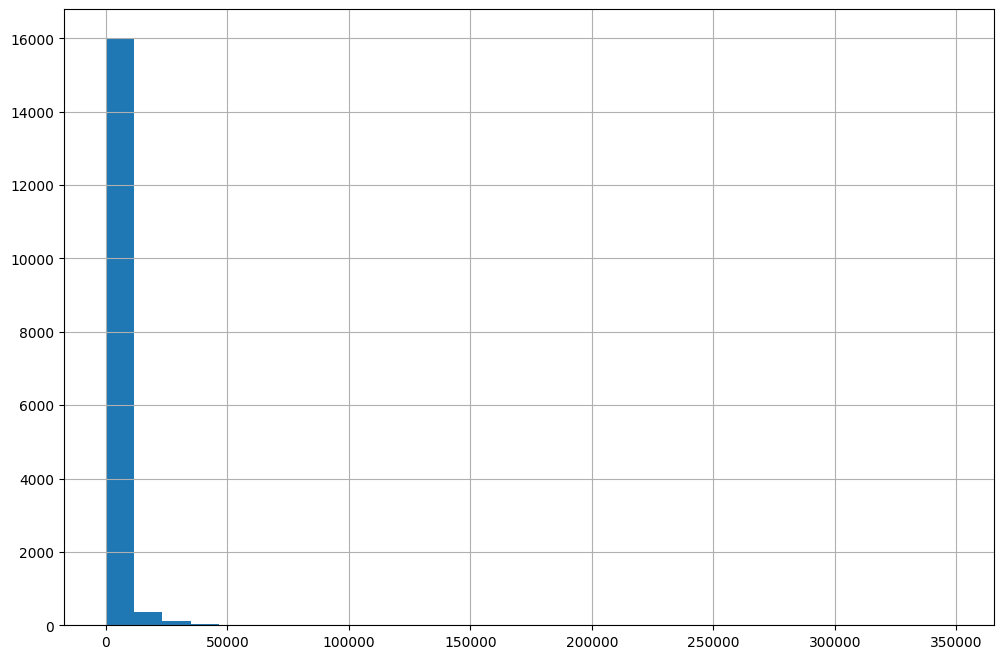

In [15]:
# Histogrammes de la colonne E3K0_1
data2[('E3KO', '1')].hist(bins=30)

**Section:** Ajoutez un titre pertinent ici

re analyse des data avec un log2 pour l'echelle

<Axes: >

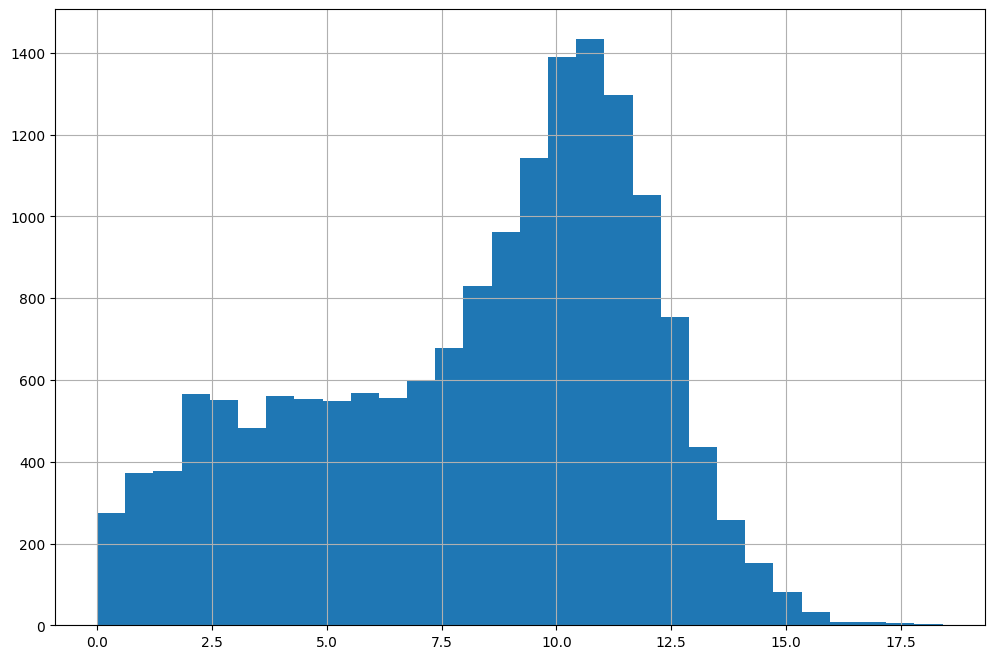

In [16]:
data2_log = np.log2(data2 + 1)
data2_log[('E3KO', '1')].hist(bins=30)

Maintenant pour tout les genes

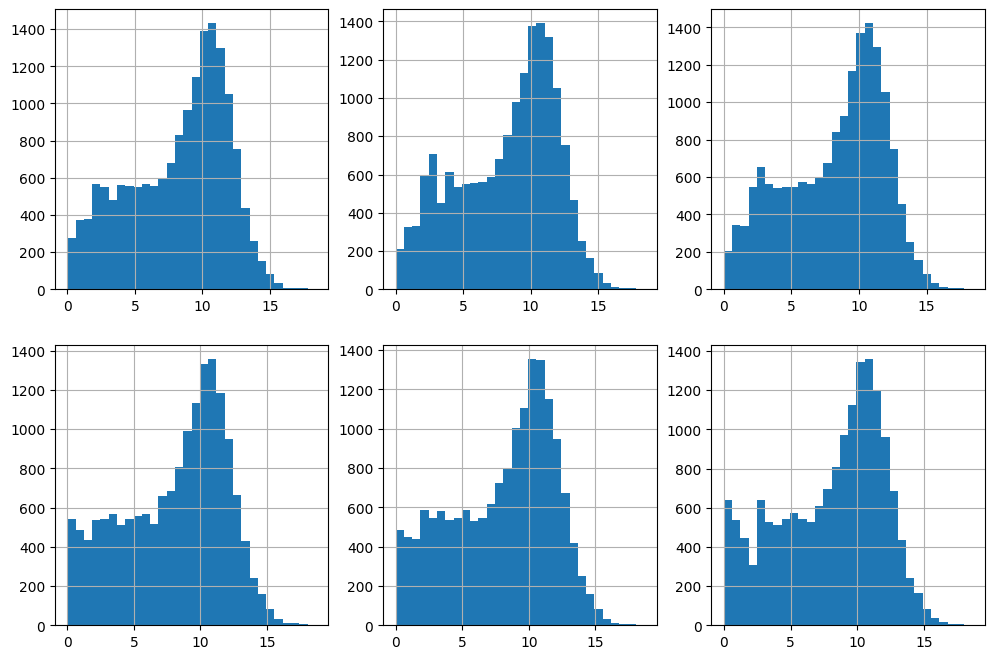

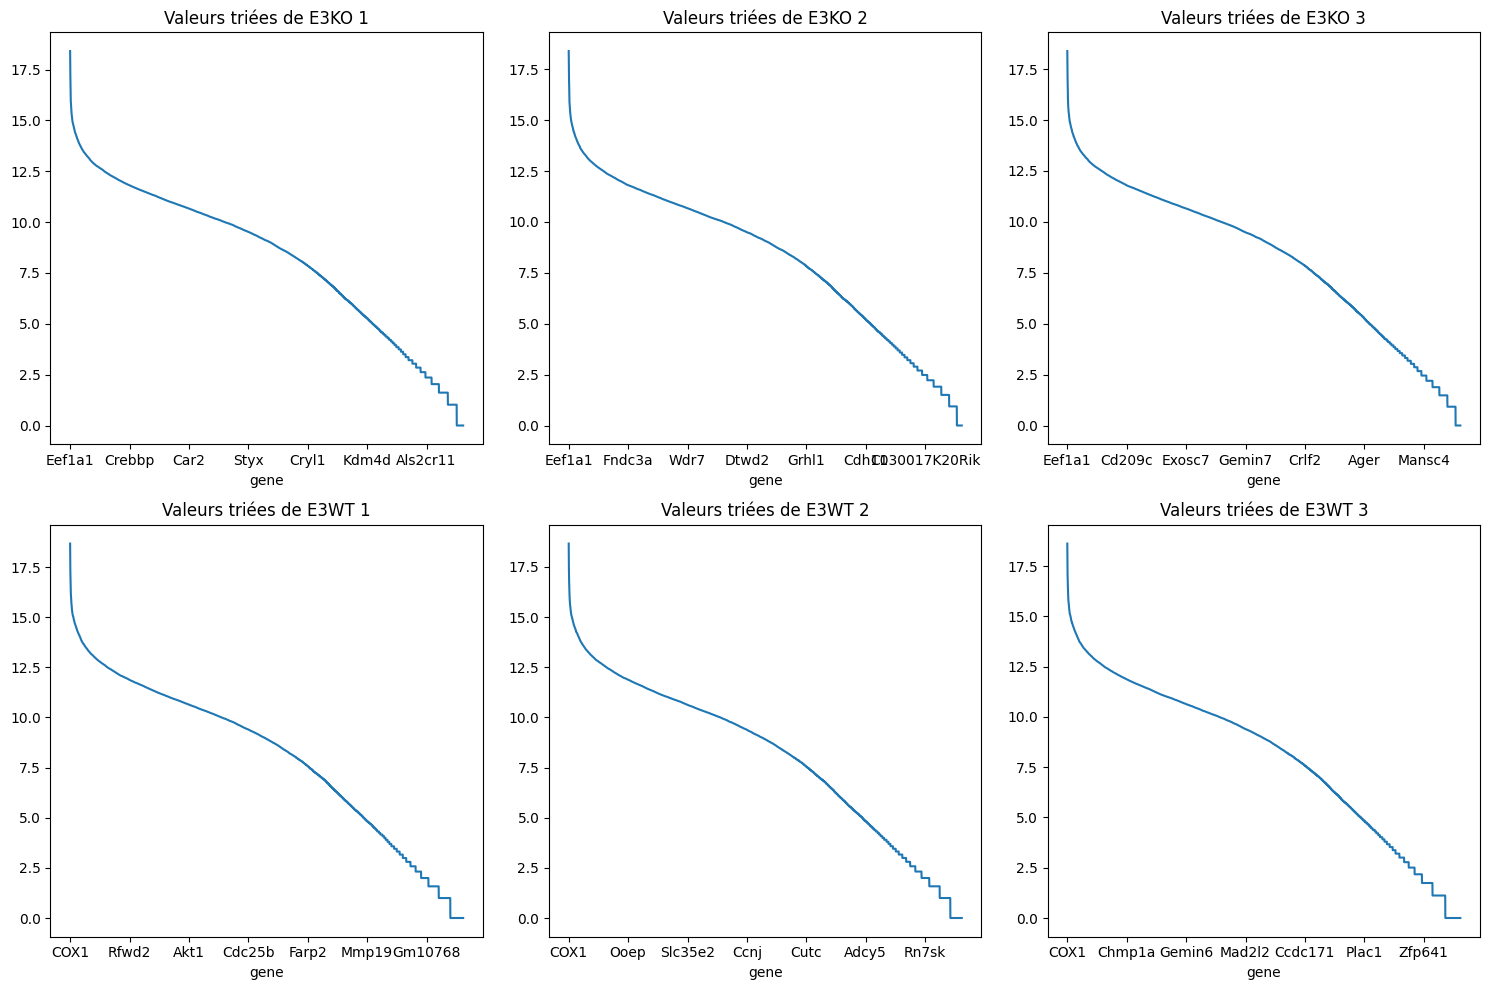

In [17]:
# Affichage des valeurs triées sur un simple graphique
experiments = 2; cols = 3; bins = 30
fig, axes = plt.subplots(experiments, cols)
for i in range(cols):
    for j, k in enumerate(['E3KO', 'E3WT']):
        data2_log[k][str(i+1)].hist(ax=axes[j][i], bins=bins)

# Affichage des valeurs triées sur un simple graphique
fig, ko = plt.subplots(experiments, cols, figsize=(15,10))
for i in range(cols):
    for j, k in enumerate(['E3KO', 'E3WT']):
        data2_log[(k, str(i+1))].sort_values(ascending=False).plot(ax=ko[j][i])
        ko[j][i].set_title(f'Valeurs triées de {k} {i+1}')
plt.tight_layout()
plt.show()

Scatter les data

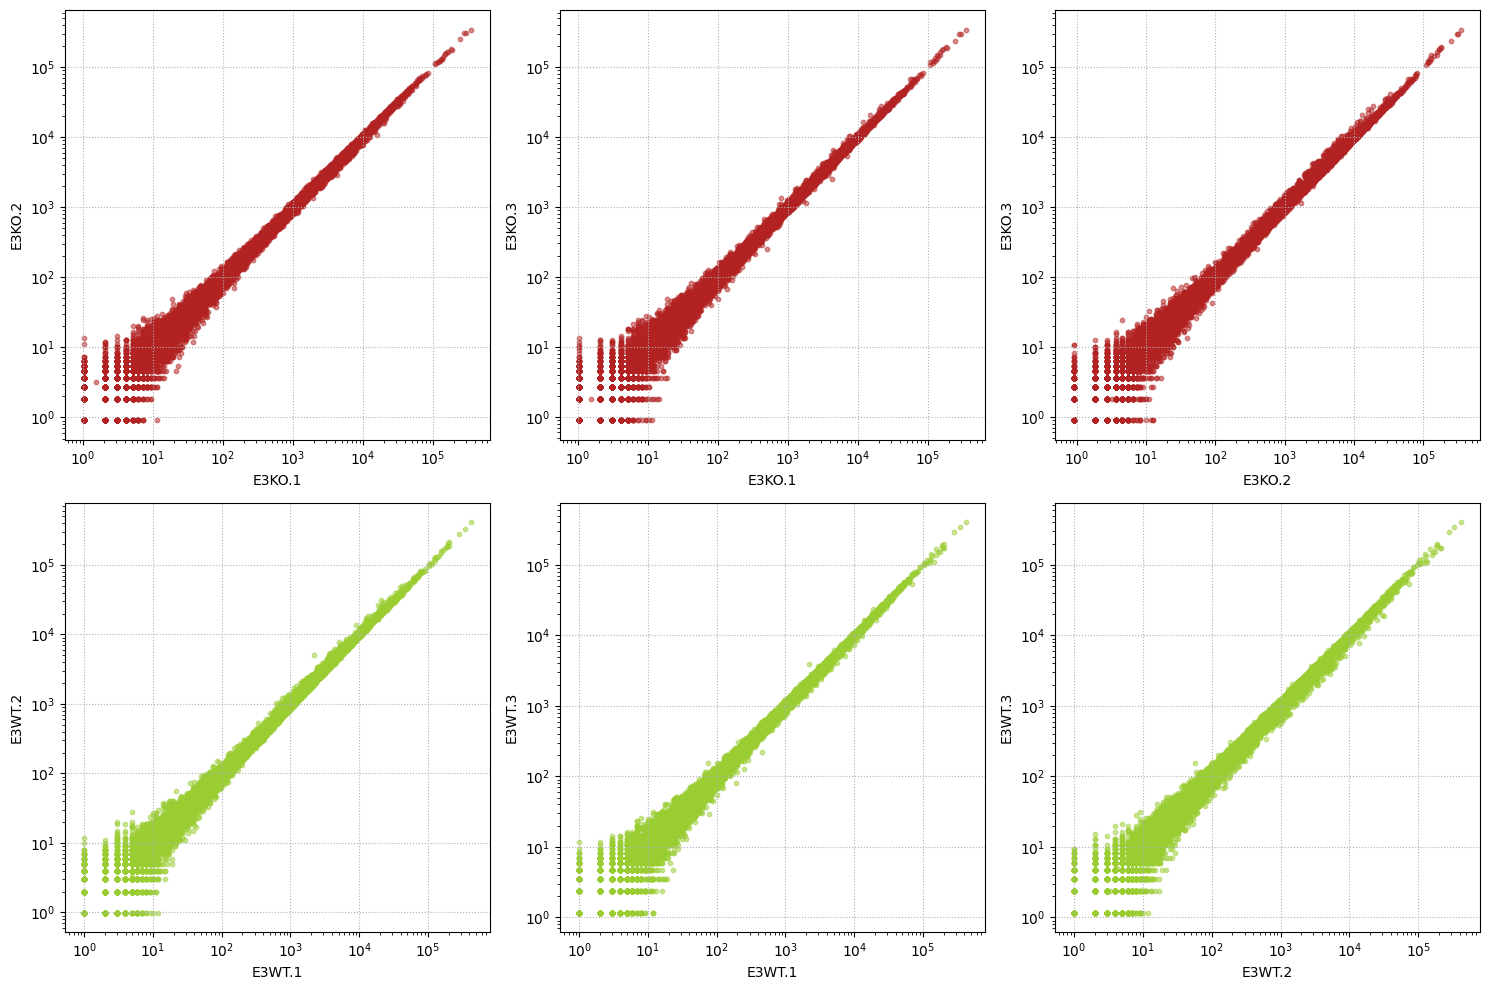

In [18]:
# import itertools pour combinaison de colonnes
import itertools

# Créer une figure avec 2 sous-figures (1 par expérience)
replicats = [str(x) for x in range(1, 4)]
experiments = ['E3KO', 'E3WT']
fig, axes = plt.subplots(len(experiments), len(list(itertools.combinations(replicats, 2))), figsize=(15, 10))

# Parcourir les combinaisons de colonnes
for i, e in enumerate(experiments):
    for j, (a, b) in enumerate(list(itertools.combinations(replicats, 2))):
        ax = axes[i, j]
        color = 'yellowgreen' if e == 'E3WT' else 'firebrick'  # Set color based on experiment
        ax.scatter(data2[(e, a)], data2[(e, b)], alpha=0.5, s=10, color=color)
        ax.set_xlabel(f"{e}.{a}")
        ax.set_xscale("log")
        ax.set_ylabel(f"{e}.{b}")
        ax.set_yscale("log")
        ax.grid(visible=True, linestyle=":")

plt.tight_layout()
plt.show()

**Section:** Ajoutez un titre pertinent ici

Calcule les moyenne par groupe

In [19]:
# Calcul des moyennes pour KO et WT
dfm = pd.DataFrame({
    'KO': data2_log[('E3KO', '1')].add(data2_log[('E3KO', '2')]).add(data2_log[('E3KO', '3')]) / 3,
    'WT': data2_log[('E3WT', '1')].add(data2_log[('E3WT', '2')]).add(data2_log[('E3WT', '3')]) / 3
})

# Affichage des premières valeurs du dataset
dfm.head()

,KO,WT
gene,,
0610005C13Rik,7.74,6.58
0610007P14Rik,10.35,10.64
0610009B22Rik,9.13,9.68
0610009D07Rik,11.01,11.25
0610009L18Rik,2.75,2.12


## MA plot

$$M=\log_2(\frac{KO}{WT})=\log_2(KO)-\log_2(WT)$$
$$A=\frac12 \log_2(KO\cdot WT) = \frac12 (\log_2(KO) + \log_2(WT))$$

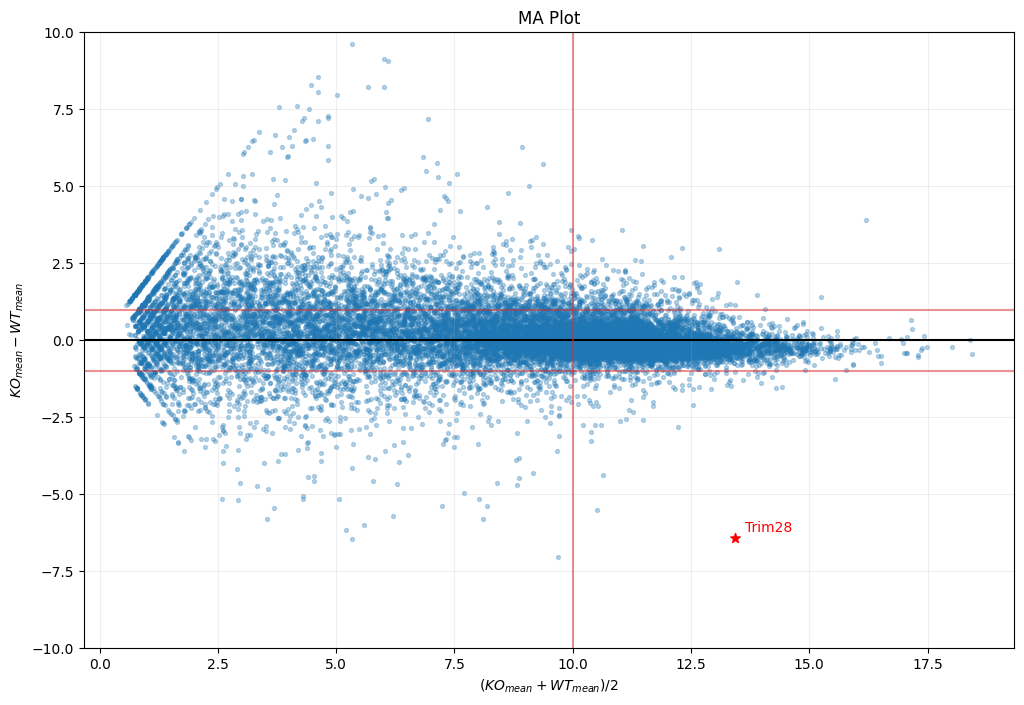

In [20]:
# Calcul de M et A
M = dfm['KO'] - dfm['WT']
A = 0.5 * (dfm['KO'] + dfm['WT'])

# Création du scatter plot
plt.scatter(A, M, s=8, alpha=0.3)
plt.xlabel('A')
plt.ylabel('M')
plt.title('MA Plot')
plt.grid(True)

# Localisation du gène Trim28
gene = "Trim28"
plt.scatter(A.loc[gene], M.loc[gene], color="red", marker='*', s=50)
plt.text(A.loc[gene] + 0.2, M.loc[gene] + 0.2, s=gene, color="red")
plt.ylabel("$KO_{mean} - WT_{mean}$")
plt.xlabel("$(KO_{mean} + WT_{mean})/2$")

# Ajout des lignes de démarcation
plt.ylim((-10, 10))
plt.axhline(y=0, color="black")
plt.axvline(x=10, color="C3", alpha=0.5)
plt.axhline(y=1, color="C3", alpha=0.5)
plt.axhline(y=-1, color="C3", alpha=0.5)
plt.grid(alpha=0.2)

plt.show()

## Get les extermes

In [21]:
# Explication : Ajoutez ici la description de ce que fait cette cellule.
# Création du dataframe MA
MA = pd.DataFrame({"M": M, "A": A})

# Sélection des valeurs positives
positive_values = MA[(MA["A"] > 10) & (MA["M"] > 1)].nlargest(5, "M")

# Sélection des valeurs négatives
negative_values = MA[(MA["A"] > 10) & (MA["M"] < 1)].nsmallest(5, "M")

# Affichage des 5 premières valeurs positives
print("Top 5 des gènes les plus exprimés :")
print(positive_values)

# Affichage des 5 premières valeurs négatives
print("\n\nTop 5 des gènes les moins exprimés :")
print(negative_values)

# Création du répertoire 'artifacts' s'il n'existe pas
os.makedirs("artifacts", exist_ok=True)

# Sauvegarde des listes en JSON
positive_values.to_json("artifacts/top-gene-up.json", orient="records")
negative_values.to_json("artifacts/top-gene-down.json", orient="records")

Top 5 des gènes les plus exprimés :
           M     A
gene              
Ccrn4l  3.90 16.20
Gm13251 3.59 11.04
Mep1b   3.38 10.11
Gm13139 3.32 10.14
Rap2a   3.27 10.40


Top 5 des gènes les moins exprimés :
           M     A
gene              
Trim28 -6.42 13.43
Cobl   -5.50 10.51
Nr0b1  -4.37 10.65
Dsg2   -3.26 10.38
Gpa33  -2.96 10.39


## Exportation du notbook

In [22]:
# Tri des valeurs MA
MA_sorted = MA.sort_values(by=["A", "M"], ascending=[False, False])

# Exportation en HTML
MA_sorted.to_html("artifacts/MA_sorted.html")

# Exportation en JSON 
MA_sorted.to_json("artifacts/MA_sorted.json", orient="records")

# Affichage des 5 premières valeurs triées
print("Top 5 des valeurs MA triées :")
print(MA_sorted.head())

Top 5 des valeurs MA triées :
             M     A
gene                
COX1     -0.44 18.43
Eef1a1    0.01 18.39
Hsp90ab1 -0.21 18.01
Hsp90aa1 -0.21 17.49
CYTB      0.14 17.43
